## `fit_residuals.ipynb`
Notebook by Tim Bartholomaus, June 18, 2019

Goal of notebook is to plot residuals between a reference profile/surface as a function of space and time, and then fit a smooth, interpolated surface through these residuals.

Residuals are expected in a dictionary, `res` with keys `"x"`, `"t"`, and `"off"`, in which `x` is position along the profile, `t` is the relative time of the residual measurement, and `off` is the measured offset between the ICESat-2 measurement and the reference surface elevation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import interpolate

import sys
sys.path.insert(0, '~/gridding/notebook')
# import utils

# print(sys.path)

In [2]:
print(sys.path)

['~/gridding/notebook', '/srv/conda/lib/python36.zip', '/srv/conda/lib/python3.6', '/srv/conda/lib/python3.6/lib-dynload', '', '/srv/conda/lib/python3.6/site-packages', '/srv/conda/lib/python3.6/site-packages/IPython/extensions', '/home/jovyan/.ipython']


#### Create synthetic residuals that are a function of length along the profile `x`, and time `t`

In [3]:
n_residuals = 30
max_length = 50*1000 # m
max_time = 100 # d
max_off = 100 # m


res = dict()
res['x'] = max_length * np.random.rand(n_residuals) # m
res['t'] = max_time * np.random.rand(n_residuals) # d

noise = np.random.randn(n_residuals) * 20 # m

off_scalar = max_off / (max_length*max_time)
res['off'] = off_scalar * res['x']*res['t'] + noise # create the synthetic residuals, with noise

#### Spatio-temporal (2-D) interpolation
Right now, the radial basis functions seem to perform best

In [10]:
# Create a mesh of the space and time variables
grid_x, grid_t = np.mgrid[0:max_length:100j, 
                          0:max_time:100j] # create a grid from 0 to max_length and 0 to
                                           #  max_time, with the j number of steps

# This griddata is too strict
grid_off = interpolate.griddata((res['x'], res['t']), res['off'], 
                                (grid_x, grid_t), method='cubic')

# # tck = interpolate.bisplrep(res['x'], res['t'], res['off'], s=2)
# # grid_off = interpolate.bisplev(grid_x[:,0], grid_t[0,:], tck)

# # f = interpolate.interp2d(res['x'], res['t'], res['off'], kind='cubic')
# # grid_off = f(grid_x[:,0], grid_t[0,:])

# Radial basis functions
x_stan = res['x']/max_length
t_stan = res['t']/max_time
rbf = interpolate.Rbf(x_stan, t_stan, res['off'], epsilon=.01)
        # epsilon defines the stiffness of the fitting routine. High values are stiff surfaces
grid_x_stan = grid_x/max_length
grid_t_stan = grid_t/max_time
grid_off = rbf(grid_x_stan, grid_t_stan)


# # Kriging
# # Function does not like NaN's, so lets remove them
# # xp, yp, zp = x[~np.isnan(z)], y[~np.isnan(z)], z[~np.isnan(z)]
# Run kriging interpolator, with 1 m RMSE noise added to the diagonal (np.ones(xp.shape)*1)
# grid_off_lsc, e_lsc = utils.lscip(res['x'], res['t'], res['off'], np.ones(res['x'].shape)*1, grid_x, grid_t, n=10, d=1e3, a=25e3)[0:2]

In [11]:
rbf.epsilon

0.01

#### Plotting

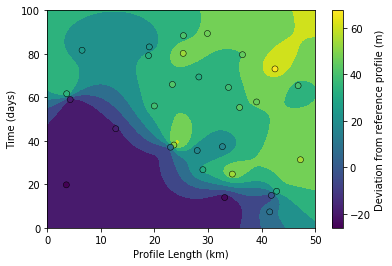

In [12]:
plt.figure()
plt.contourf(grid_x/1000, grid_t, (grid_off))
plt.scatter(res['x']/1000, res['t'], c=res['off'], linewidth=.5, edgecolor='k')
plt.xlabel('Profile Length (km)')
plt.ylabel('Time (days)')
plt.colorbar(label='Deviation from reference profile (m)');
plt.show()

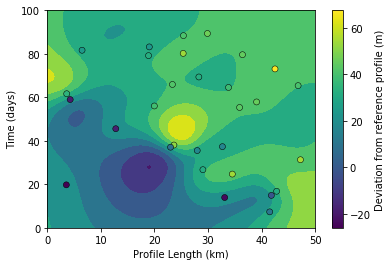

In [9]:
plt.figure()
plt.contourf(grid_x/1000, grid_t, (grid_off))
plt.scatter(res['x']/1000, res['t'], c=res['off'], linewidth=.5, edgecolor='k')
plt.xlabel('Profile Length (km)')
plt.ylabel('Time (days)')
plt.colorbar(label='Deviation from reference profile (m)');
plt.show()